In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
EVAL_FOLDER_PATH = os.path.join('..', 'runs', 'eval')
TRAIN_FOLDER_PATH = os.path.join('..', 'runs', 'train')

In [3]:
situations = [
    "has-food-in-nest", # DROP FOOD
    "has-food-out-nest", # FOLLOW NEST PHEROMONE WHILE RELEASING FOOD PHEROMONE
    "food-available-in-nest", # FOLLOW FOOD PHEROMONE
    "food-available-out-nest", # TAKE FOOD
    "food-not-available" # FOLLOW FOOD PHEROMONE
]

In [4]:
file_subfolder = 'eval_04_07_2025__10_20_07'
output_file_name = 'iql_eval_output_04_07_2025__10_20_07.csv'

output_complete_path = os.path.join(EVAL_FOLDER_PATH, file_subfolder, output_file_name)

In [5]:
reward_type = "reward_nest_food_punish_wandering_time"

In [6]:
df = pd.read_csv(output_complete_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 56 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Episode                                                               2000 non-null   int64  
 1   Tick                                                                  2000 non-null   int64  
 2   Avg reward X episode                                                  2000 non-null   float64
 3   random-walk                                                           2000 non-null   int64  
 4   lay-food-pheromone                                                    2000 non-null   int64  
 5   follow-food-pheromone                                                 2000 non-null   int64  
 6   follow-nest-pheromone                                                 2000 non-null   int64  
 7

In [7]:
df.filter(like = "has-food-out-nest").describe()

,has-food-out-nest,has-food-out-nest_random-walk,has-food-out-nest_lay-food-pheromone,has-food-out-nest_follow-food-pheromone,has-food-out-nest_follow-nest-pheromone,has-food-out-nest_take-food,has-food-out-nest_drop-food,has-food-out-nest_random-walk-and-lay-food-pheromone,has-food-out-nest_follow-nest-pheromone-and-lay-food-pheromone
count,2000.000000,2000.0,2000.0,2000.0,2000.000000,2000.0,2000.0,2000.0,2000.000000
mean,1091.493500,0.0,0.0,0.0,566.106000,0.0,0.0,0.0,525.387500
std,49.883736,0.0,0.0,0.0,45.925225,0.0,0.0,0.0,45.668875
min,921.000000,0.0,0.0,0.0,420.000000,0.0,0.0,0.0,385.000000
25%,1059.000000,0.0,0.0,0.0,536.000000,0.0,0.0,0.0,495.000000
50%,1092.000000,0.0,0.0,0.0,566.500000,0.0,0.0,0.0,525.000000
75%,1124.000000,0.0,0.0,0.0,596.000000,0.0,0.0,0.0,556.000000
max,1262.000000,0.0,0.0,0.0,712.000000,0.0,0.0,0.0,670.000000


In [8]:
situations_dict = {}
for situation in situations:
    situations_dict[situation] = df.filter(like = situation)

In [9]:
for situation in situations:
    print(situations_dict[situation].keys())

Index(['has-food-in-nest', 'has-food-in-nest_random-walk',
       'has-food-in-nest_lay-food-pheromone',
       'has-food-in-nest_follow-food-pheromone',
       'has-food-in-nest_follow-nest-pheromone', 'has-food-in-nest_take-food',
       'has-food-in-nest_drop-food',
       'has-food-in-nest_random-walk-and-lay-food-pheromone',
       'has-food-in-nest_follow-nest-pheromone-and-lay-food-pheromone'],
      dtype='object')
Index(['has-food-out-nest', 'has-food-out-nest_random-walk',
       'has-food-out-nest_lay-food-pheromone',
       'has-food-out-nest_follow-food-pheromone',
       'has-food-out-nest_follow-nest-pheromone',
       'has-food-out-nest_take-food', 'has-food-out-nest_drop-food',
       'has-food-out-nest_random-walk-and-lay-food-pheromone',
       'has-food-out-nest_follow-nest-pheromone-and-lay-food-pheromone'],
      dtype='object')
Index(['food-available-in-nest', 'food-available-in-nest_random-walk',
       'food-available-in-nest_lay-food-pheromone',
       'food-a

In [10]:
situations_dict["has-food-out-nest"].div(situations_dict["has-food-out-nest"]["has-food-out-nest"], axis = "index").drop(["has-food-out-nest"], axis = 1).mean()

has-food-out-nest_random-walk                                     0.000000
has-food-out-nest_lay-food-pheromone                              0.000000
has-food-out-nest_follow-food-pheromone                           0.000000
has-food-out-nest_follow-nest-pheromone                           0.518681
has-food-out-nest_take-food                                       0.000000
has-food-out-nest_drop-food                                       0.000000
has-food-out-nest_random-walk-and-lay-food-pheromone              0.000000
has-food-out-nest_follow-nest-pheromone-and-lay-food-pheromone    0.481319
dtype: float64

In [11]:
percentage_dict = {}
for situation in situations:
    percentage_dict[situation] = situations_dict[situation].div(situations_dict[situation][situation], axis = "index").drop([situation], axis = 1).mean()
    print()
    print(percentage_dict[situation])
    


has-food-in-nest_random-walk                                     0.0
has-food-in-nest_lay-food-pheromone                              0.0
has-food-in-nest_follow-food-pheromone                           0.0
has-food-in-nest_follow-nest-pheromone                           0.0
has-food-in-nest_take-food                                       0.0
has-food-in-nest_drop-food                                       1.0
has-food-in-nest_random-walk-and-lay-food-pheromone              0.0
has-food-in-nest_follow-nest-pheromone-and-lay-food-pheromone    0.0
dtype: float64

has-food-out-nest_random-walk                                     0.000000
has-food-out-nest_lay-food-pheromone                              0.000000
has-food-out-nest_follow-food-pheromone                           0.000000
has-food-out-nest_follow-nest-pheromone                           0.518681
has-food-out-nest_take-food                                       0.000000
has-food-out-nest_drop-food                             

In [12]:
complete_labels_dict = {
    "has-food-in-nest" : ["random walk", "lay food ph.", "follow food ph.", "follow nest ph.", "take food", "drop food", "random walk while laying food ph.", "follow nest ph. while laying food ph."], 
    "has-food-out-nest" : ["random walk", "lay food ph.", "follow food ph.", "follow nest ph.", "take food", "drop food", "random walk while laying food ph.", "follow nest ph. while laying food ph."],
    "food-available-in-nest" : ["random walk", "lay food ph.", "follow food ph.", "follow nest ph.", "take food", "drop food", "random walk while laying food ph.", "follow nest ph. while laying food ph."], 
    "food-available-out-nest" : ["random walk", "lay food ph.", "follow food ph.", "follow nest ph.", "take food", "drop food", "random walk while laying food ph.", "follow nest ph. while laying food ph."], 
    "food-not-available": ["random walk", "lay food ph.", "follow food ph.", "follow nest ph.", "take food", "drop food", "random walk while laying food ph.", "follow nest ph. while laying food ph."]
}

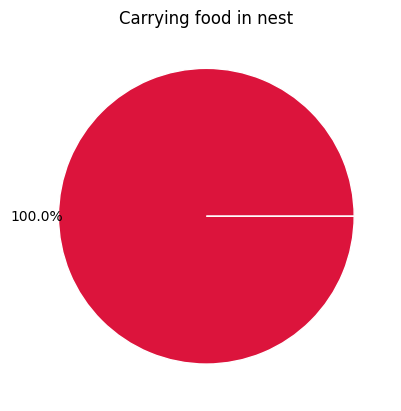

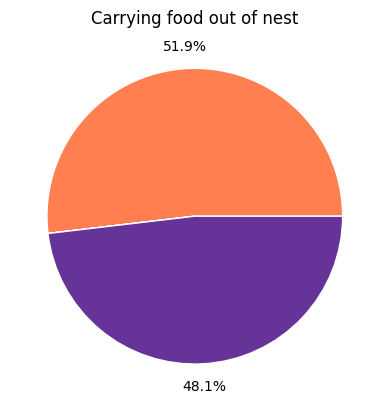

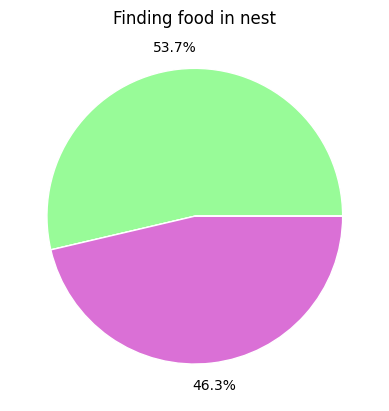

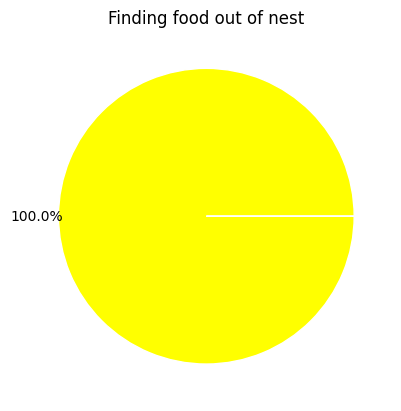

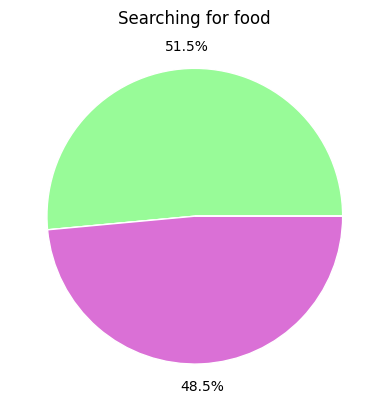

In [13]:
colors = ["palegreen", "skyblue", "orchid", "coral", "yellow", "crimson", "mediumslateblue", "rebeccapurple"]
titles = {"has-food-in-nest" : "Carrying food in nest", "has-food-out-nest" : "Carrying food out of nest", "food-available-in-nest" : "Finding food in nest", "food-available-out-nest" : "Finding food out of nest", "food-not-available" : "Searching for food"}

for situation in situations:
    fig, ax = plt.subplots()
    ax.pie(percentage_dict[situation], autopct=lambda p: '{:.1f}%'.format(p) if p >= 0.1 else '', wedgeprops = {"linewidth": 1, "edgecolor": "white"}, colors = colors, labeldistance = None, labels = complete_labels_dict[situation], pctdistance=1.15)
    plt.title(titles[situation])
    plt.savefig(titles[situation].replace(" ", "_") + "_" + reward_type + "_" + "restricted_action")
    plt.show()


In [47]:
train_file_subfolder = 'train_04_07_2025__23_24_11'
train_output_file_name = 'iql_train_output_04_07_2025__23_24_11.csv'

train_output_complete_path = os.path.join(TRAIN_FOLDER_PATH, train_file_subfolder, train_output_file_name)

In [48]:
df = pd.read_csv(train_output_complete_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 57 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Episode                                                               5000 non-null   int64  
 1   Tick                                                                  5000 non-null   int64  
 2   Avg reward X episode                                                  5000 non-null   float64
 3   random-walk                                                           5000 non-null   int64  
 4   lay-food-pheromone                                                    5000 non-null   int64  
 5   follow-food-pheromone                                                 5000 non-null   int64  
 6   follow-nest-pheromone                                                 5000 non-null   int64  
 7

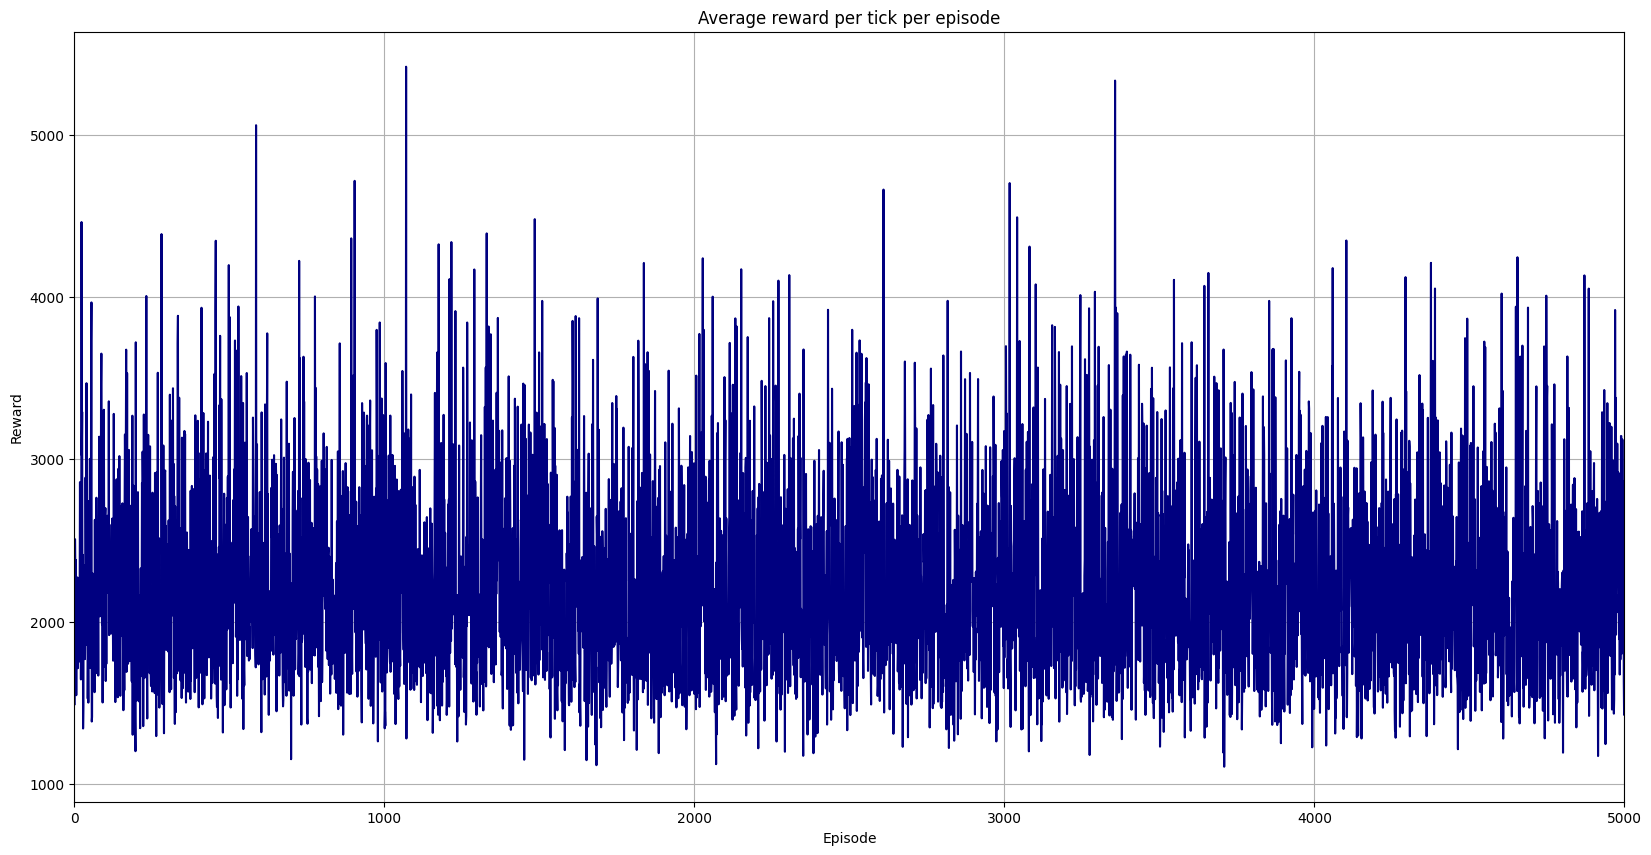

In [49]:
reward_type = "reward_relative_food_punish_wandering_time"
plt.figure(figsize = (20, 10))
plt.plot(df["Episode"], df["Avg reward X episode"], color = "navy")
plt.grid(visible = True)
plt.xlim(0, 5000)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title("Average reward per tick per episode")
#plt.savefig("Training_reward_plot" + "_" + reward_type + "_" + "restricted_action")
plt.show()

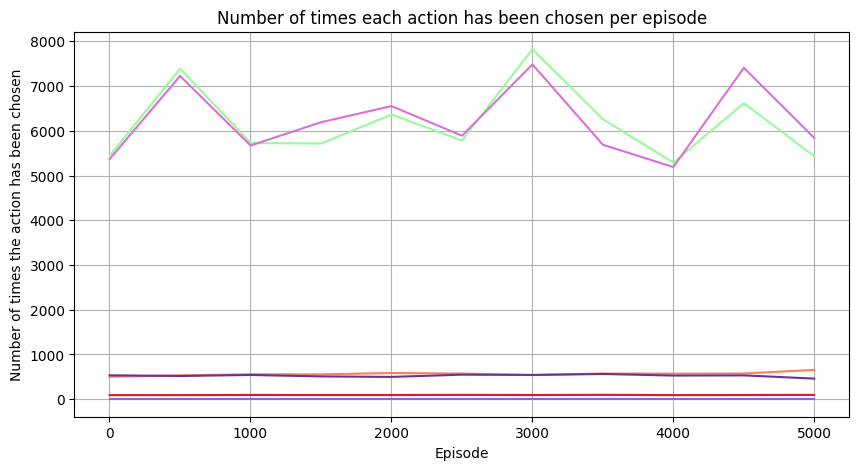

In [50]:
actions = ["random-walk", "lay-food-pheromone", "follow-food-pheromone", "follow-nest-pheromone", "take-food", "drop-food", "random-walk-and-lay-food-pheromone", "follow-nest-pheromone-and-lay-food-pheromone"]
plt.figure(figsize = (10, 5))
plt.ylabel("Number of times the action has been chosen")
plt.xlabel("Episode")
plt.title("Number of times each action has been chosen per episode")
for i, action in enumerate(actions):
    plt.plot(df["Episode"].loc[[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 4999]], df[action].loc[[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 4999]], color = colors[i])
plt.grid(visible = True)
#plt.savefig("Training_actions_plot" + "_" + reward_type + "_" + "restricted_action")
plt.show()

# Do not use from here on

In [25]:
pickle_file_name = 'iql_eval_pickle_04_08_2025__22_48_56.pkl'

pickle_complete_path = os.path.join(EVAL_FOLDER_PATH, file_subfolder, pickle_file_name)

In [26]:
import pickle

with open(pickle_complete_path, 'rb') as f:
    agents_situations_actions_dict = pickle.load(f)


FileNotFoundError: [Errno 2] No such file or directory: '..\\runs\\eval\\eval_04_10_2025__20_06_46\\iql_eval_pickle_04_08_2025__22_48_56.pkl'

In [ ]:
import pandas as pd
agents_situations_actions_df = pd.DataFrame.from_dict({(level1, level2, level3): value
                             for level1, inner_dict in agents_situations_actions_dict.items()
                             for level2, inner_inner_dict in inner_dict.items()
                             for level3, value in inner_inner_dict.items()}, orient='index')

In [ ]:
agents_situations_actions_df

0    1  2  3  4  5   6   7
1    0  has-food-in-nest         0    0  0  0  0  0   0   0
        has-food-out-nest        0    0  0  0  0  0   0   0
        food-available-in-nest   0    0  0  0  0  0   0   0
        food-available-out-nest  0    0  0  0  0  0   0   0
        food-not-available       0  473  0  6  1  0  15   5
...                             ..  ... .. .. .. ..  ..  ..
2000 49 has-food-in-nest         0    0  0  0  0  0   0   0
        has-food-out-nest        0    0  0  0  0  0   0   0
        food-available-in-nest   0  473  0  0  0  0   0   0
        food-available-out-nest  0    0  0  0  0  0   0   0
        food-not-available       1    0  5  1  2  2   2  14

[500000 rows x 8 columns]

In [ ]:
agents_situations_actions_df = agents_situations_actions_df.reset_index().rename({"level_0": "Episode", "level_1": "Agent", "level_2" : "Situation"}, axis = 1)
agents_situations_actions_df

,Episode,Agent,Situation,0,1,2,3,4,5,6,7
0,1,0,has-food-in-nest,0,0,0,0,0,0,0,0
1,1,0,has-food-out-nest,0,0,0,0,0,0,0,0
2,1,0,food-available-in-nest,0,0,0,0,0,0,0,0
3,1,0,food-available-out-nest,0,0,0,0,0,0,0,0
4,1,0,food-not-available,0,473,0,6,1,0,15,5
...,...,...,...,...,...,...,...,...,...,...,...
499995,2000,49,has-food-in-nest,0,0,0,0,0,0,0,0
499996,2000,49,has-food-out-nest,0,0,0,0,0,0,0,0
499997,2000,49,food-available-in-nest,0,473,0,0,0,0,0,0
499998,2000,49,food-available-out-nest,0,0,0,0,0,0,0,0


In [ ]:
agents_situations_actions_df = agents_situations_actions_df.groupby(["Agent", "Situation"]).sum(['0', '1', '2', '3', '4', '5', '6', '7'])
agents_situations_actions_df

0       1     2      3      4     5      6  \
Agent Situation                                                                 
0     food-available-in-nest       0  582084     0      0      0    22     98   
      food-available-out-nest   2376       0  1831    841      0   537   1797   
      food-not-available       16516  259183  7456  15634   3535  4215  49791   
      has-food-in-nest             0       0     0      0      0     0      0   
      has-food-out-nest            0       0     0      0      0     0      0   
...                              ...     ...   ...    ...    ...   ...    ...   
9     food-available-in-nest      26   52623     0     12     13     0     14   
      food-available-out-nest      0       0     0   1429      0     0   2020   
      food-not-available       31493  817386  9030  26747  51177  1509   2823   
      has-food-in-nest             0       0     0      0      0     0      0   
      has-food-out-nest            0       0     0      0      0     0      0   

                                   7  
Agent Situation                       
0     food-available-in-nest       0  
      food-available-out-nest    142  
      food-not-available       53942  
      has-food-in-nest             0  
      has-food-out-nest            0  
...                              ...  
9     food-available-in-nest       0  
      food-available-out-nest   2704  
      food-not-available         994  
      has-food-in-nest             0  
      has-food-out-nest            0  

[250 rows x 8 columns]

In [ ]:
agents_situations_actions_df.div(agents_situations_actions_df.sum(axis = 1), axis = 0).fillna(0.0)

0         1         2         3  \
Agent Situation                                                         
0     food-available-in-nest   0.000000  0.999794  0.000000  0.000000   
      food-available-out-nest  0.315789  0.000000  0.243355  0.111776   
      food-not-available       0.040256  0.631735  0.018173  0.038106   
      has-food-in-nest         0.000000  0.000000  0.000000  0.000000   
      has-food-out-nest        0.000000  0.000000  0.000000  0.000000   
...                                 ...       ...       ...       ...   
9     food-available-in-nest   0.000493  0.998766  0.000000  0.000228   
      food-available-out-nest  0.000000  0.000000  0.000000  0.232244   
      food-not-available       0.033462  0.868489  0.009595  0.028419   
      has-food-in-nest         0.000000  0.000000  0.000000  0.000000   
      has-food-out-nest        0.000000  0.000000  0.000000  0.000000   

                                      4         5         6         7  
Agent Situation                                                        
0     food-available-in-nest   0.000000  0.000038  0.000168  0.000000  
      food-available-out-nest  0.000000  0.071372  0.238836  0.018873  
      food-not-available       0.008616  0.010274  0.121361  0.131479  
      has-food-in-nest         0.000000  0.000000  0.000000  0.000000  
      has-food-out-nest        0.000000  0.000000  0.000000  0.000000  
...                                 ...       ...       ...       ...  
9     food-available-in-nest   0.000247  0.000000  0.000266  0.000000  
      food-available-out-nest  0.000000  0.000000  0.328295  0.439460  
      food-not-available       0.054377  0.001603  0.002999  0.001056  
      has-food-in-nest         0.000000  0.000000  0.000000  0.000000  
      has-food-out-nest        0.000000  0.000000  0.000000  0.000000  

[250 rows x 8 columns]

In [ ]:
agents_situations_actions_df.idxmax(axis = "columns")

Agent  Situation              
0      food-available-in-nest     1
       food-available-out-nest    0
       food-not-available         1
       has-food-in-nest           0
       has-food-out-nest          0
                                 ..
9      food-available-in-nest     1
       food-available-out-nest    7
       food-not-available         1
       has-food-in-nest           0
       has-food-out-nest          0
Length: 250, dtype: object

In [ ]:
res = agents_situations_actions_df.idxmax(axis = "columns").groupby(["Situation"]).value_counts()
res

Situation                 
food-available-in-nest   1    50
food-available-out-nest  7    14
                         4     8
                         3     7
                         2     6
                         5     5
                         0     4
                         6     4
                         1     2
food-not-available       1    19
                         7     8
                         3     6
                         5     5
                         0     4
                         6     4
                         4     3
                         2     1
has-food-in-nest         0    40
                         5    10
has-food-out-nest        0    42
                         3     4
                         5     2
                         2     1
                         7     1
Name: count, dtype: int64

In [ ]:
sum_res = res.reset_index().rename({"level_1": "Action"}, axis = 1).loc[:, ["Situation", "count"]].groupby(["Situation"]).sum()
sum_res

,count
Situation,
food-available-in-nest,50
food-available-out-nest,50
food-not-available,50
has-food-in-nest,50
has-food-out-nest,50


<Axes: xlabel='Situation,None'>

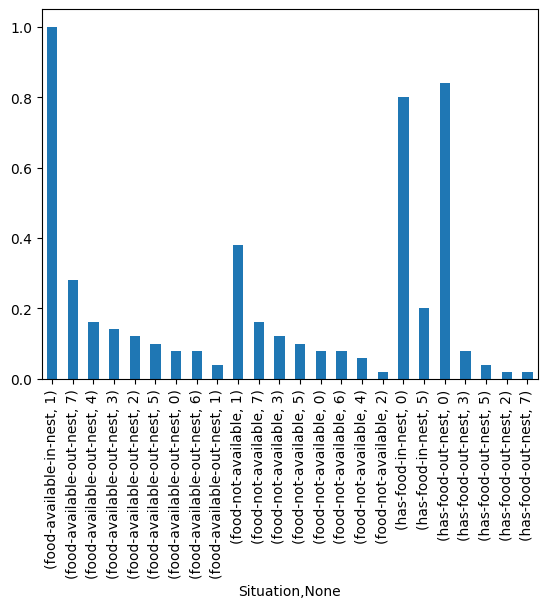

In [ ]:
(res/50).plot.bar()

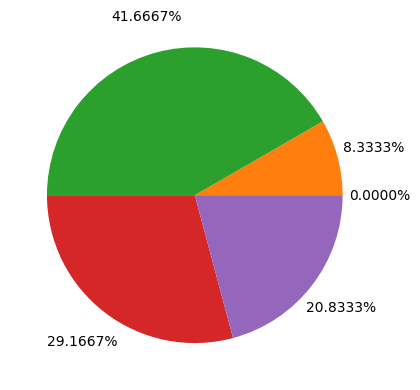

In [ ]:
fig, ax = plt.subplots()
ax.pie([0, 10, 50, 35, 25], autopct='%1.4f%%', pctdistance=1.25)
plt.show()